In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:70% !important; }</style>"))

In [2]:
import os
import pandas as pd
from termcolor import colored
import numpy as np
from collections import OrderedDict
from collections import Counter
import matplotlib.pyplot as plt
from natsort import natsorted
import sys
import pickle
import seaborn as sns

# Display pandas df without truncation
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

np.set_printoptions(edgeitems=30, linewidth=100000, formatter=dict(float=lambda x: "%.3g" % x))



## Simple boxplot func

In [3]:
green_diamond = dict(markerfacecolor='g', marker='D')

def simple_boxplot(my_dict, fig_name, yLim, save_flag):
    fig, ax = plt.subplots(figsize=(20, 5), dpi=80)
    ax.boxplot(my_dict.values(), flierprops=green_diamond)
    ax.set_xticklabels(my_dict.keys())
    ax.grid()
    plt.ylim(-1,yLim)
    plt.tight_layout()
    if save_flag:
        plt.savefig(fig_name+'.png')

In [4]:
num_robot = 24
experiment_time = 1800
num_run = 100

In [5]:
# results_folder = '/home/luigi/Documents/ARGoS/argos_results_scripts/DHTF/standAlone/results/persistent/Respawn#30_2021-07-08_robots#24MIXED'
# results_folder = '/home/luigi/Documents/ARGoS/argos_results_scripts/DHTF/standAlone/results/brownian/Respawn#30_2021-07-08_robots#24MIXED'
# results_folder = '/home/luigi/Documents/ARGoS/argos_results_scripts/DHTF/standAlone/results/brownian/Regions'
# results_folder = '/home/luigi/Documents/ARGoS/argos_results_scripts/DHTF/standAlone/results/persistent/Regions'
results_folder = '/home/luigi/Documents/ARGoS/argos_results_scripts/DHTF/standAlone/results/adaptive/Regions'

In [6]:
if not os.path.isdir(results_folder):
    print(colored("Error, " + results_folder + " does not exist", 'red'))
else:
    print(colored("OK, " + results_folder + " exists", 'green'))

OK, /home/luigi/Documents/ARGoS/argos_results_scripts/DHTF/standAlone/results/adaptive/Regions exists


In [7]:
completed_task_label = ["time", "areaID", "creation_time", "completion_time", "type", "kID_on_top", "kIDs"]

## Completed areas per kilobot

In [8]:
completed_task_dict = {}

timeout = -1
for timeout_folder in natsorted(os.listdir(os.path.join(results_folder))):
    print(colored("Timeout folder:", 'blue'),timeout_folder)
    
    parameters = timeout_folder.split("_")
    
    for param in parameters:
        if param.startswith("timeout"):
#             print(param.split("#")[-1])
            timeout = int(param.split("#")[-1]) * 10
            print("\ttimeout:",timeout)
    
#     if timeout == 20 :
#         break
        
    if timeout == -1 :
        print(colored("\tWARNING: wrong timeout folder", 'green'))
        continue

    completed_task_count = []
    for filename in os.listdir(os.path.join(results_folder, timeout_folder)):
        if filename.endswith("completed_taskLOG.tsv"):
            if not os.path.getsize(os.path.join(results_folder, timeout_folder, filename)) > 0:
                print(colored("\tWARNING, empty file at:" + filename, 'red'))
                continue
#             print('\tfilename: ', filename)
            
            df_completedTask = pd.read_csv(os.path.join(results_folder, timeout_folder, filename), sep="\t", header=None)
            df_completedTask.columns = completed_task_label
            completed_area_kIDs = np.array([]).astype(int)
            for area in df_completedTask["kIDs"].values:
            #     print(np.fromstring(area, dtype=int, sep=','))
                completed_area_kIDs = np.append(completed_area_kIDs, np.fromstring(area, dtype=int, sep=','))
            counter = Counter(completed_area_kIDs)
            
            for i in np.arange(num_robot):
                if i not in counter.keys():
#                     print(i)
                    counter[i] = 0
                    
            completed_task_count += list(counter.values())
#             print(elapsed_timeout_count)
    
    if len(completed_task_count):
        completed_task_dict[str(timeout)] = completed_task_count
    else:
        print(colored("\tWARNING: empty list!!", 'green'))
        completed_task_dict[str(timeout)] = [0] * num_robot * num_run
            


Timeout folder: Regions_AdaptiveWalk_2021-07-12_robots#24_timeout#1_respawn#30_NumAreas#16_redAreas#8_1800#seconds
	timeout: 10
Timeout folder: Regions_AdaptiveWalk_2021-07-12_robots#24_timeout#3_respawn#30_NumAreas#16_redAreas#8_1800#seconds
	timeout: 30
Timeout folder: Regions_AdaptiveWalk_2021-07-12_robots#24_timeout#6_respawn#30_NumAreas#16_redAreas#8_1800#seconds
	timeout: 60
Timeout folder: Regions_AdaptiveWalk_2021-07-12_robots#24_timeout#12_respawn#30_NumAreas#16_redAreas#8_1800#seconds
	timeout: 120
Timeout folder: Regions_AdaptiveWalk_2021-07-12_robots#24_timeout#18_respawn#30_NumAreas#16_redAreas#8_1800#seconds
	timeout: 180
Timeout folder: Regions_AdaptiveWalk_2021-07-12_robots#24_timeout#24_respawn#30_NumAreas#16_redAreas#8_1800#seconds
	timeout: 240
Timeout folder: Regions_AdaptiveWalk_2021-07-12_robots#24_timeout#30_respawn#30_NumAreas#16_redAreas#8_1800#seconds
	timeout: 300
Timeout folder: Regions_AdaptiveWalk_2021-07-12_robots#24_timeout#36_respawn#30_NumAreas#16_redA

### Persistent

In [ ]:
saveFigure = False
figName = "completedTaskMean_persistent_"+results_folder.split("/")[-1]
print("Figure name: ", figName)
simple_boxplot(completed_task_dict, figName, 30, saveFigure)

### Brownian

In [ ]:
saveFigure = False
figName = "completedTaskMean_brownian_"+results_folder.split("/")[-1]
print("Figure name: ", figName)
simple_boxplot(completed_task_dict, figName, 30, saveFigure)

### Adaptive

Figure name:  completedTaskMean_adaptive_Regions


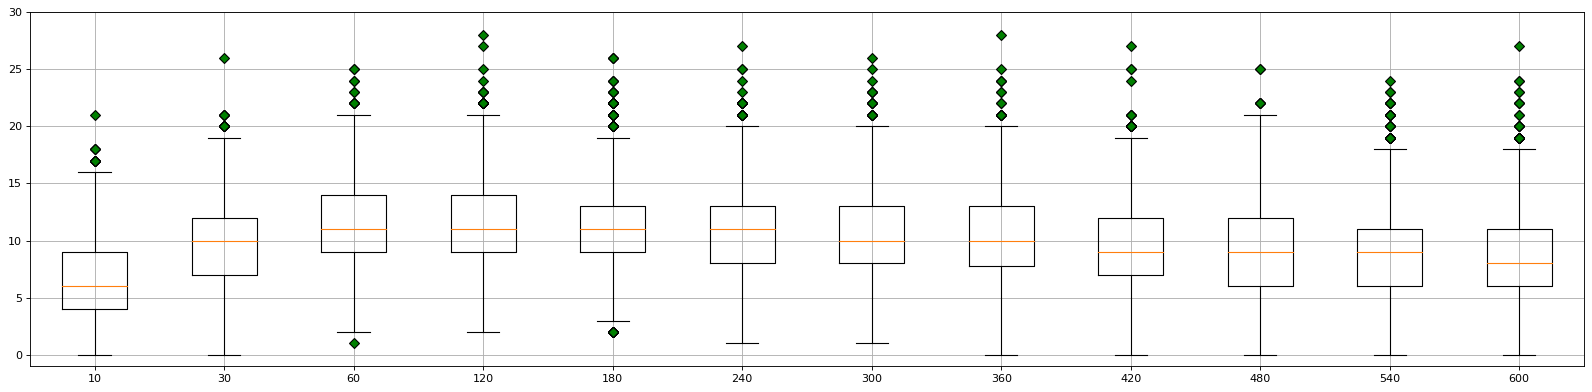

In [9]:
saveFigure = True
figName = "completedTaskMean_adaptive_"+results_folder.split("/")[-1]
print("Figure name: ", figName)
simple_boxplot(completed_task_dict, figName, 30, saveFigure)

## Completed areas in general

In [10]:
completed_task_dict = {}

timeout = -1
for timeout_folder in natsorted(os.listdir(os.path.join(results_folder))):
    print(colored("Timeout folder:", 'blue'),timeout_folder)
    
    parameters = timeout_folder.split("_")
    
    for param in parameters:
        if param.startswith("timeout"):
#             print(param.split("#")[-1])
            timeout = int(param.split("#")[-1]) * 10
            print("\ttimeout:",timeout)
    
#     if timeout == 20 :
#         break
        
    if timeout == -1 :
        print(colored("\tWARNING: wrong timeout folder", 'green'))
        continue

    completed_task_count = []
    for filename in os.listdir(os.path.join(results_folder, timeout_folder)):
        if filename.endswith("completed_taskLOG.tsv"):
            if not os.path.getsize(os.path.join(results_folder, timeout_folder, filename)) > 0:
                print(colored("\tWARNING, empty file at:" + filename, 'red'))
                completed_task_dict[str(timeout)] = 0
                continue
#             print('\tfilename: ', filename)
            
            df_completedTask = pd.read_csv(os.path.join(results_folder, timeout_folder, filename), sep="\t", header=None)
            completed_task_count += [df_completedTask.shape[0]]
            
    if(len(completed_task_count)!= 100):
        print(colored("\tWARNING, completed_task_count should be 100!", 'red'))
    print(colored("\tlen(completed_task_count)"+str(len(completed_task_count)), 'blue'))
    completed_task_dict[str(timeout)] = completed_task_count
    
            


Timeout folder: Regions_AdaptiveWalk_2021-07-12_robots#24_timeout#1_respawn#30_NumAreas#16_redAreas#8_1800#seconds
	timeout: 10
	len(completed_task_count)100
Timeout folder: Regions_AdaptiveWalk_2021-07-12_robots#24_timeout#3_respawn#30_NumAreas#16_redAreas#8_1800#seconds
	timeout: 30
	len(completed_task_count)100
Timeout folder: Regions_AdaptiveWalk_2021-07-12_robots#24_timeout#6_respawn#30_NumAreas#16_redAreas#8_1800#seconds
	timeout: 60
	len(completed_task_count)100
Timeout folder: Regions_AdaptiveWalk_2021-07-12_robots#24_timeout#12_respawn#30_NumAreas#16_redAreas#8_1800#seconds
	timeout: 120
	len(completed_task_count)100
Timeout folder: Regions_AdaptiveWalk_2021-07-12_robots#24_timeout#18_respawn#30_NumAreas#16_redAreas#8_1800#seconds
	timeout: 180
	len(completed_task_count)100
Timeout folder: Regions_AdaptiveWalk_2021-07-12_robots#24_timeout#24_respawn#30_NumAreas#16_redAreas#8_1800#seconds
	timeout: 240
	len(completed_task_count)100
Timeout folder: Regions_AdaptiveWalk_2021-07-1

### Persistent

In [ ]:
saveFigure = True
figureName = "completedTask_persistent_"+results_folder.split("/")[-1]
print(figureName)
simple_boxplot(completed_task_dict, figureName, 170, saveFigure)

### Brownian

In [ ]:
saveFigure = True
figureName = "completedTask_brownian_"+results_folder.split("/")[-1]
print(figureName)
simple_boxplot(completed_task_dict, figureName, 170, saveFigure)

### Adaptive

completedTask_adaptive_Regions


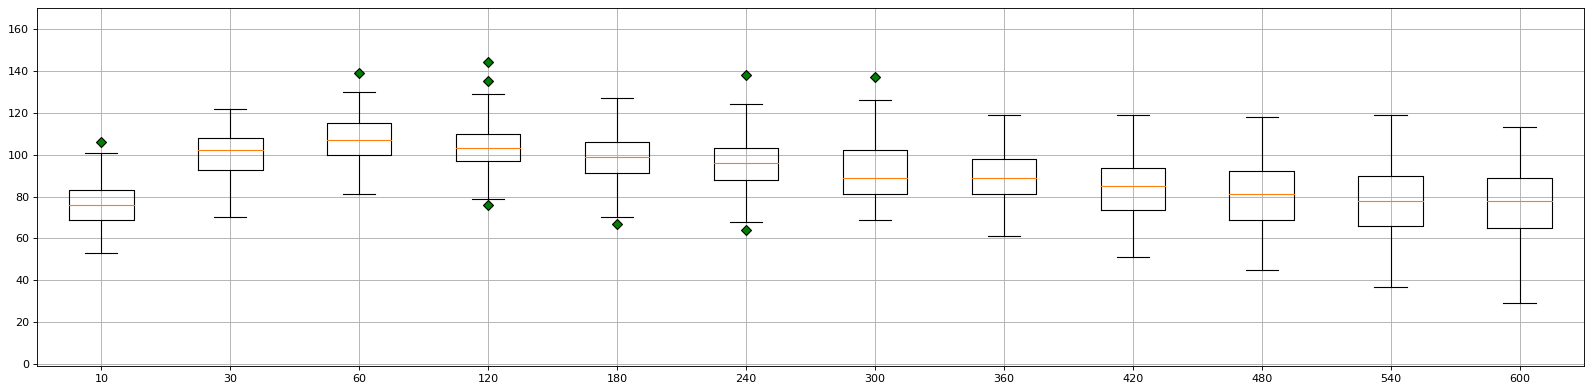

In [11]:
saveFigure = True
figureName = "completedTask_adaptive_"+results_folder.split("/")[-1]
print(figureName)
simple_boxplot(completed_task_dict, figureName, 170, saveFigure)